

# Project: Investigate a Dataset - [No Show Appointments]

## Table of Contents
<ul>
<li><a href="#intro">Dataset Description</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Dataset Description

The dataset used in this analysis contains information from over 100,000 medical appointments in Brazil.

Each row in the dataset represents a single medical appointment and has details about the patient, appointment, and whether the patient shows up.

The goal of this dataset is to help identify factors that may be related to patients missing their scheduled medical appointments.

The dataset includes the following columns:

- **patientid**: A unique identifier for each patient.
- **appointmentid**: A unique identifier for each appointment.
- **gender**: The patient’s gender.
- **scheduledday**: The date and time when the appointment was scheduled.
- **appointmentday**: The date of the actual appointment.
- **age**: The age of the patient.
- **neighbourhood**: The location of the hospital or clinic.
- **scholarship**: Indicates whether the patient is enrolled in the Bolsa Família welfare program
  (1 = yes, 0 = no).
- **hypertension**: Indicates whether the patient has hypertension.
- **diabetes**: Indicates whether the patient has diabetes.
- **alcoholism**: Indicates whether the patient has alcoholism.
- **handcap**: Indicates whether the patient has a disability.
- **sms_received**: Indicates whether the patient received an SMS reminder.
- **no_show**: Indicates whether the patient missed the appointment
  (1 = did not show up, 0 = showed up).

## Question for Analysis

The main question guiding this analysis:

**What factors are associated with patients missing their scheduled medical appointments?**

To explore this question, the following questions will be investigated:

- Is there a relationship to patient age and appointment no-shows?
- Is there a relationship between enrollment in the Bolsa Família scholarship program and no-shows?
- Does the amount of time between scheduling the appointment and the appointment date affect no-shows rates?
- Is there a relationship between patients recieving an SMS reminder and patients attending their appointments?


In this analysis, the dependent variable is whether a patient missed their appointment (no_show).
The independent variables explored include age, scholarship status, days between scheduling and the appointment, and whether an SMS reminder was received.

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def bar_plot(data, title, xlabel, ylabel):
    ax = data.plot(kind='bar')
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    plt.tight_layout()
    return ax

<a id='wrangling'></a>
## Data Wrangling

In [8]:
df = pd.read_csv('./Database_No_show_appointments/noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [9]:
df.shape
#This shows how many columns and rows there are.

(110527, 14)

In [10]:
df.columns
#This shows the names of the columns.

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [27]:
df.info()
#Shows data types, if there are missing values, and memory usage.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [11]:

df.describe()
# Statistical overview of numerical columns.

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


### Data Cleaning

#### Missing Values

The dataset was checked for missing values. All columns contained complete data except for 'no_show' column, which showed the missing values due to the way it was converted from text to numeric values during cleaning.

In [12]:
df.isna().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

#### Cleaning Column Names

The column names were standardized by converting them to lowercase and replacing hyphens with underscores. This makes it easier to reference code and helps with readability.

In [13]:
df.columns = df.columns.str.strip().str.lower().str.replace('-', '_')
df.columns

Index(['patientid', 'appointmentid', 'gender', 'scheduledday',
       'appointmentday', 'age', 'neighbourhood', 'scholarship', 'hipertension',
       'diabetes', 'alcoholism', 'handcap', 'sms_received', 'no_show'],
      dtype='object')

#### Rename Column

One column name in the dataset was misspelled. The column was renamed to correct the spelling so it is clearer for analysis.

In [14]:
df = df.rename(columns={'hipertension': 'hypertension'})
df.columns

Index(['patientid', 'appointmentid', 'gender', 'scheduledday',
       'appointmentday', 'age', 'neighbourhood', 'scholarship', 'hypertension',
       'diabetes', 'alcoholism', 'handcap', 'sms_received', 'no_show'],
      dtype='object')

#### Converting the No-Show Column

The 'no-show' column originally contained the values "No" and "Yes". The column was convered so that 0 represents patients who showed up and 1 can represent patients who did not show up. This makes it easier to analyze.

In [15]:
df['no_show'] = df['no_show'].map({'No': 0, 'Yes': 1})
df['no_show'].value_counts()

0    88208
1    22319
Name: no_show, dtype: int64

#### Converting Date Columns to DateTime 

The scheduled and appointment date columns were converted to datetime format. This allows the dates to be used for calculations, such as measuring the number of days between scheduling and the appointment.

In [16]:
df['scheduledday'] = pd.to_datetime(df['scheduledday'])
df['appointmentday'] = pd.to_datetime(df['appointmentday'])

df[['scheduledday', 'appointmentday']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 2 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   scheduledday    110527 non-null  datetime64[ns, UTC]
 1   appointmentday  110527 non-null  datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](2)
memory usage: 1.7 MB


#### Removing Negative Age Values

Some records contained negative age values, which are not realistic. These rows were removed to ensure that age related analysis is accurate.

In [17]:
df = df[df['age'] >= 0]
df['age'].describe()

count    110526.000000
mean         37.089219
std          23.110026
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: age, dtype: float64

<a id='eda'></a>
## Exploratory Data Analysis

### No-Show Distribution

The 'no_show' column was examined to see how many patients showed up for their appointments and how many missed them. The 'value_counts()' function was used to count each outcome. This helps show how common no-shows are in the dataset.

In [18]:
df['no_show'].value_counts()

0    88207
1    22319
Name: no_show, dtype: int64

<AxesSubplot: title={'center': 'Appointment Attendance Counts'}, xlabel='Appointment Outcome (0 = Showed Up, 1 = No-Show)', ylabel='Number of Appointments'>

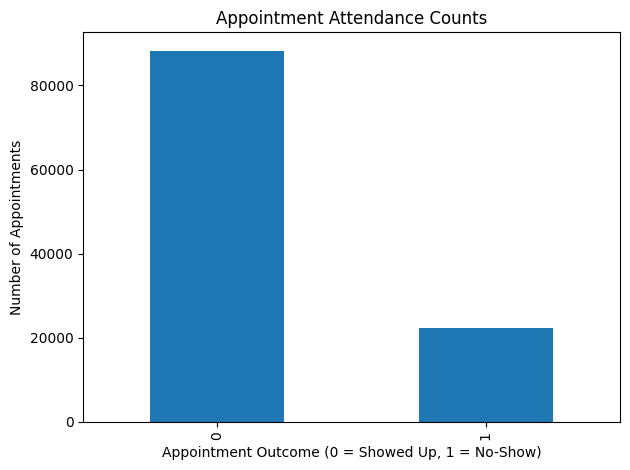

In [39]:
bar_plot(
    df['no_show'].value_counts(),
    title='Appointment Attendance Counts',
    xlabel='Appointment Outcome (0 = Showed Up, 1 = No-Show)',
    ylabel='Number of Appointments'

)

Most patients shows up for their appointments, while a small number of patients did not.
This shows that no-shows occur less often, but still happen often enough to analyze. 

### Is Age Related to Whether a Patient Shows Up for their Appointment?

Age was compared between patients who showed up and those who missed their appointments. The data was grouped by appointment outcome to summarize age differences.


In [21]:
df.groupby('no_show')['age'].describe()


,count,mean,std,min,25%,50%,75%,max
no_show,,,,,,,,
0,88207.0,37.790504,23.338645,0.0,18.0,38.0,56.0,115.0
1,22319.0,34.317667,21.965941,0.0,16.0,33.0,51.0,115.0


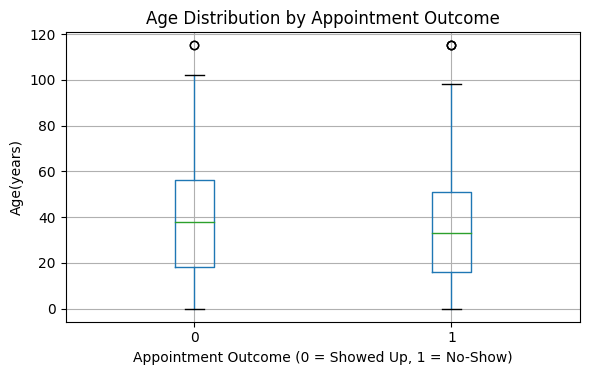

In [38]:
ax = df.boxplot(column='age',by='no_show', figsize=(6,4))

ax.set_title('Age Distribution by Appointment Outcome')
plt.suptitle('')
ax.set_xlabel('Appointment Outcome (0 = Showed Up, 1 = No-Show)')
ax.set_ylabel('Age(years)')
plt.tight_layout()

The age distribution for patients who missed appointments is slightly younger than for those who showed up. However, because there is a lot of overlap between the group, age alone does not appear to be a strong factor in predicting appointment no-shows.

### Is Scholarship Status Related to Appointment Attendance?

Scholarship status was compared to see how often patients missed their appointments. The data was grouped by scholarship status to calculate the average no-show rate for each group.

In [34]:
df.groupby('scholarship')['no_show'].mean()

scholarship
0    0.198074
1    0.237363
Name: no_show, dtype: float64

<AxesSubplot: title={'center': 'No-Show Rate by Scholarship Status'}, xlabel='Scholarship (0 = No, 1 = Yes)', ylabel='No-Show Rate'>

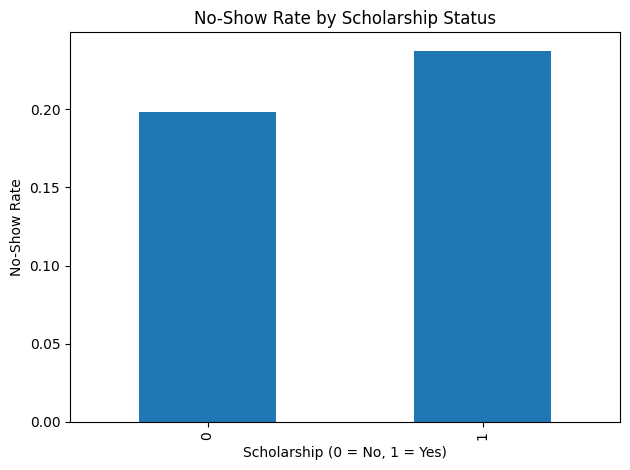

In [40]:
df.groupby('scholarship')['no_show'].mean().plot(kind='bar')

bar_plot(
    df.groupby('scholarship')['no_show'].mean(),
    title='No-Show Rate by Scholarship Status',
    xlabel='Scholarship (0 = No, 1 = Yes)',
    ylabel='No-Show Rate'
)

Patients with a scholarship miss appointments more often than patients without a scholarship. This suggests that scholarship status may be related to appointment attendance.

### Does the Amount of Time Between Scheduling and the Appointment Affect Whether Patients Miss their Appointments?

A new column called 'days_between' was created to show how many days passed between the appointment and the appointment date.

The data was grouped by appointment outcome to compare wait times for patients who showed up and those who missed their appointments.

In [26]:
df['days_between'] = (df['appointmentday'] - df['scheduledday']).dt.days

In [27]:
df[['scheduledday','appointmentday','days_between']].head()

,scheduledday,appointmentday,days_between
0,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,-1
1,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,-1
2,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,-1
3,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,-1
4,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,-1


In [28]:
df['days_between'].describe()

count    110526.000000
mean          9.183794
std          15.255034
min          -7.000000
25%          -1.000000
50%           3.000000
75%          14.000000
max         178.000000
Name: days_between, dtype: float64

In [29]:
df.groupby('no_show')['days_between'].describe()

,count,mean,std,min,25%,50%,75%,max
no_show,,,,,,,,
0,88207.0,7.754759,14.550450,-1.0,-1.0,1.0,11.0,178.0
1,22319.0,14.831489,16.605912,-7.0,3.0,10.0,22.0,178.0


<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

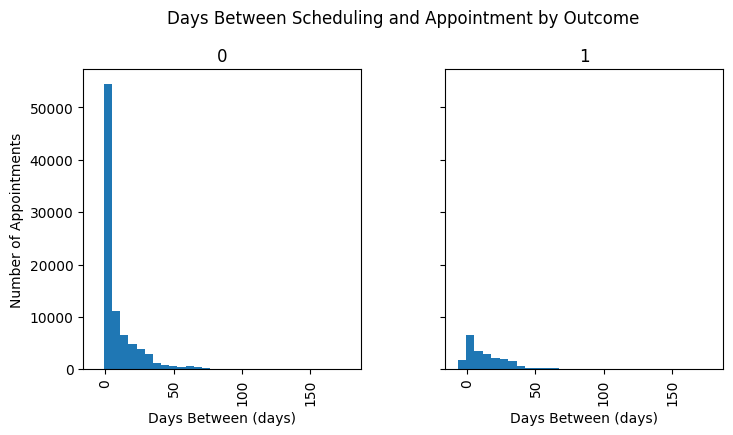

In [31]:
axes = df['days_between'].hist(
    by=df['no_show'], 
    bins=30, 
    figsize=(8,4), 
    sharex=True, 
    sharey=True)

plt.suptitle('Days Between Scheduling and Appointment by Outcome',
            y=1.05)

for ax in axes.flatten():
    ax.set_xlabel('Days Between (days)')
    ax.set_ylabel('Number of Appointments')
    
plt.tight_layout

Appointments with longer wait times between scheduling and the appointment tend to have higher no-show rates. This shows that patients may be more likely to miss appointments that are scheduled farther in advance.

### Is Receiving an SMS Reminder Related to Appointment Attendance?

SMS reminders were reviewed to see if there was a difference in appointment attendance. The data was grouped by whether a reminder was received to compare no-show rates.

In [32]:
df.groupby('sms_received')['no_show'].mean()

sms_received
0    0.167035
1    0.275745
Name: no_show, dtype: float64

<AxesSubplot: title={'center': 'No-Show Rate by SMS Reminder'}, xlabel='SMS Received (0 = No, 1 = Yes)', ylabel='No-Show Rate'>

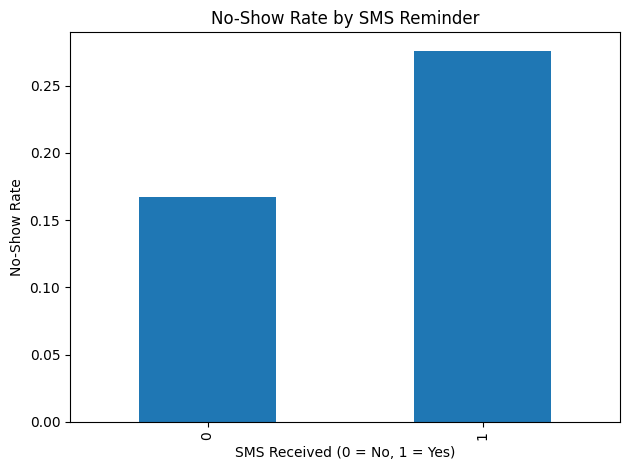

In [33]:
df.groupby('sms_received')['no_show'].mean().plot(kind='bar')

bar_plot(
    df.groupby('sms_received')['no_show'].mean(),
    title='No-Show Rate by SMS Reminder',
    xlabel='SMS Received (0 = No, 1 = Yes)',
    ylabel='No-Show Rate')

Patients who recieved SMS reminders had high no-show rates. This suggests reminders may be targeted toward patients more likely to miss appointments.

<a id='conclusions'></a>
## Conclusions

This analysis looked at factors related to patients missing their scheduled appointments. Age, scholarship status, SMS reminders, and the number of days between scheduling and the appointment date were examined.

Age showed a small relationship with appointment attendance. Patients who missed appointments tended to be slightly younger, but many ages overlapped between groups, meaning just age is not a strong factor.

Scholarship status showed a clearer pattern. PAtients enrolled in the Bolsa Família program missed appointments more often thatn patients who were not enrolled. 

Patients who received SMS reminders had higher no-show rates that those who did not. This might mean reminders are sent to patients who are already likely to miss appointments, rather than preventing no-shows.

The strongest relationship was the time between scheduling and the appointment. Appointments scheduled farther in advance were more likely to be missed, while appointments scheduled closer to the appointment date were more likely to be attended.

### Limitations

This analysis is exploratory and does not show cause and effect. The results only show relationships between variables.

The dataset also does not include information such as transportation, work schedules, or personal reasons, which could affect whether patients attend their appointments. 
